## Image Restoration

Design a system that can restore degraded images using techniques such as inverse filtering, Wiener filtering, total variation regularization, etc.

In [67]:
import cv2
image = cv2.imread('./image/image_noise.jpg', cv2.IMREAD_GRAYSCALE)

In [41]:
import cv2
image = cv2.imread('./image/image_blur.jpg', cv2.IMREAD_GRAYSCALE)

In [109]:
import cv2
image = cv2.imread('./image/image_zip.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
import cv2
image = cv2.imread('./image/sample_image.jpg', cv2.IMREAD_GRAYSCALE)

Mean filtering

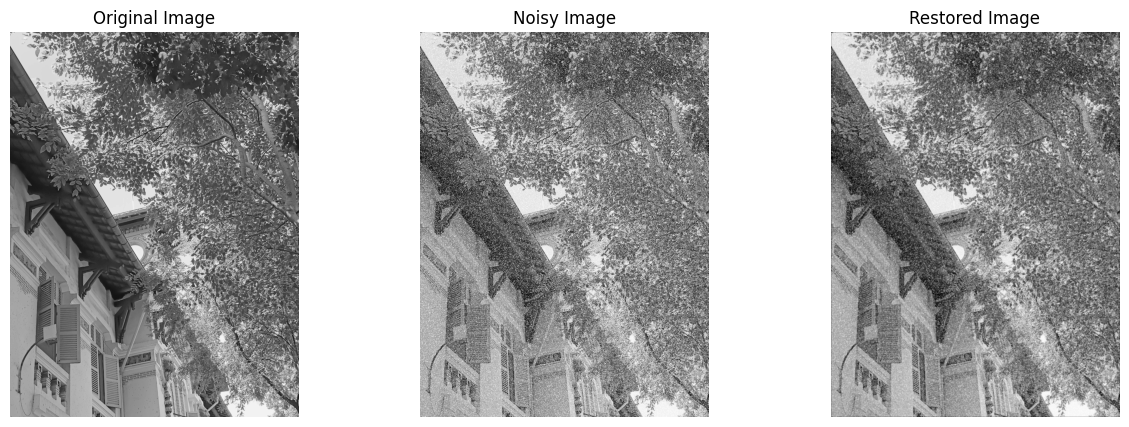

SSIM: 0.33
PSNR: 13.52


In [110]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def meanFilter(image: np.ndarray, kernelSize: int = 3, keepShape: bool = True) -> np.ndarray:
    # Calculate padding size based on kernel size
    padding = kernelSize // 2
    
    # Add padding to the image
    paddedImage = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_CONSTANT)
    
    # Initialize an empty result image
    result = np.zeros_like(image)
    
    # Apply mean filter
    for i in range(padding, paddedImage.shape[0] - padding):
        for j in range(padding, paddedImage.shape[1] - padding):
            # Extract region of interest (ROI) from the padded image
            roi = paddedImage[i - padding:i + padding + 1, j - padding:j + padding + 1]
            
            # Calculate the mean value of the ROI
            averageValue = np.mean(roi)
            
            # Assign the mean value to the corresponding pixel in the result image
            result[i - padding, j - padding] = averageValue
    
    # If keepShape is False, remove padding and resize result image to match the original image shape
    if not keepShape:
        result = result[padding:result.shape[0] - padding, padding:result.shape[1] - padding]
    
    return result

# Add Gaussian noise to the image
noise = np.random.normal(0, 1, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, noise)

# Apply mean filter to the noisy image
mean_restored_image = meanFilter(noisy_image)

# Calculate SSIM and PSNR
mean_ssim_score = ssim(noisy_image, mean_restored_image)
mean_psnr_score = psnr(noisy_image, mean_restored_image)

# Display the original, noisy, and restored images using matplotlib.pyplot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mean_restored_image, cmap='gray')
plt.title('Restored Image')
plt.axis('off')

plt.show()

print(f"SSIM: {mean_ssim_score:.2f}")
print(f"PSNR: {mean_psnr_score:.2f}")


Median filtering

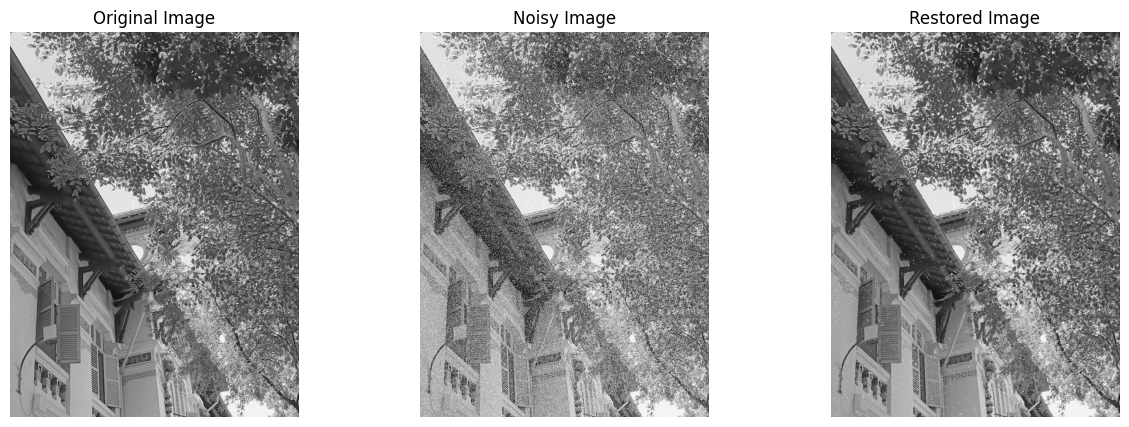

SSIM: 0.30
PSNR: 12.81


In [111]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def medianFilter(image: np.ndarray, kernelSize: int = 3, keepShape: bool = True):
    # Tính kích thước padding dựa trên kích thước kernel
    padding = kernelSize // 2
    
    # Thêm padding 0 vào ảnh
    paddedImage = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    
    # Khởi tạo ảnh kết quả rỗng
    result = np.zeros_like(image)
    
    # Áp dụng bộ lọc trung vị
    for i in range(padding, paddedImage.shape[0] - padding):
        for j in range(padding, paddedImage.shape[1] - padding):
            # Trích xuất vùng quan tâm (ROI) từ ảnh có padding
            roi = paddedImage[i - padding:i + padding + 1, j - padding:j + padding + 1]
            
            # Tính giá trị trung vị của ROI
            medianValue = np.median(roi)
            
            # Gán giá trị trung vị cho pixel tương ứng trong ảnh kết quả
            result[i - padding, j - padding] = medianValue
    
    # Nếu keepShape là False, loại bỏ padding và thay đổi kích thước ảnh kết quả để khớp với kích thước ảnh đầu vào
    if not keepShape:
        result = result[padding:result.shape[0] - padding, padding:result.shape[1] - padding]
    
    return result

# Add Gaussian noise to the image
noise = np.random.normal(0, 1, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, noise)

# Apply median filter to the noisy image
median_restored_image = medianFilter(noisy_image)

# Calculate SSIM and PSNR
median_ssim_score = ssim(noisy_image, median_restored_image)
median_psnr_score = psnr(noisy_image, median_restored_image)

# Display the original, noisy, and restored images using matplotlib.pyplot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(median_restored_image, cmap='gray')
plt.title('Restored Image')
plt.axis('off')

plt.show()

print(f"SSIM: {median_ssim_score:.2f}")
print(f"PSNR: {median_psnr_score:.2f}")


Gaussian filter

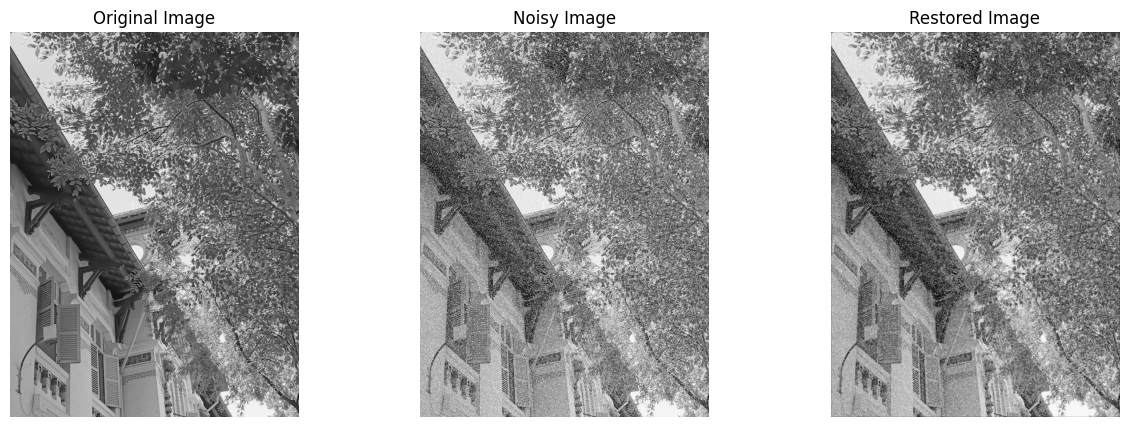

SSIM: 0.47
PSNR: 14.52


In [113]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def gkernel(l=3, sig=2):
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

def gaussianFilter(image: np.ndarray, 
                   kernelSize: int = 3, 
                   sigma: float = 1.0, 
                   keepShape: bool = True):
    # Tính kích thước padding dựa trên kích thước kernel
    padding = kernelSize // 2
    
    # Thêm padding vào ảnh
    paddedImage = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    
    # Tạo kernel Gaussian
    kernel = gkernel(l=kernelSize, sig=sigma)
    
    # Khởi tạo ảnh kết quả rỗng
    result = np.zeros_like(image)
    
    # Áp dụng bộ lọc Gaussian
    for i in range(padding, paddedImage.shape[0] - padding):
        for j in range(padding, paddedImage.shape[1] - padding):
            # Trích xuất vùng quan tâm (ROI) từ ảnh có padding
            roi = paddedImage[i - padding:i + padding + 1, j - padding:j + padding + 1]
            
            # Tích chập ROI với kernel Gaussian
            filteredValue = np.sum(roi * kernel)
            
            # Gán giá trị đã lọc cho pixel tương ứng trong ảnh kết quả
            result[i - padding, j - padding] = filteredValue
    
    # Nếu keepShape là False, loại bỏ padding và thay đổi kích thước ảnh kết quả để khớp với kích thước ảnh đầu vào
    if not keepShape:
        result = result[padding:result.shape[0] - padding, padding:result.shape[1] - padding]
    
    return result

# Tạo nhiễu Gaussian
noise = np.random.normal(0, 1, image.shape).astype(np.uint8)

# Thêm nhiễu vào ảnh gốc
noisy_image = cv2.add(image, noise)

# Áp dụng bộ lọc Gaussian lên ảnh nhiễu
gaussian_restored_image = gaussianFilter(noisy_image)

# Tính SSIM và PSNR
gaussian_ssim_score = ssim(noisy_image, gaussian_restored_image)
gaussian_psnr_score = psnr(noisy_image, gaussian_restored_image)

# Hiển thị ảnh gốc và ảnh đã được lọc bằng matplotlib.pyplot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gaussian_restored_image, cmap='gray')
plt.title('Restored Image')
plt.axis('off')

plt.show()

print(f"SSIM: {gaussian_ssim_score:.2f}")
print(f"PSNR: {gaussian_psnr_score:.2f}")


Inverse filtering

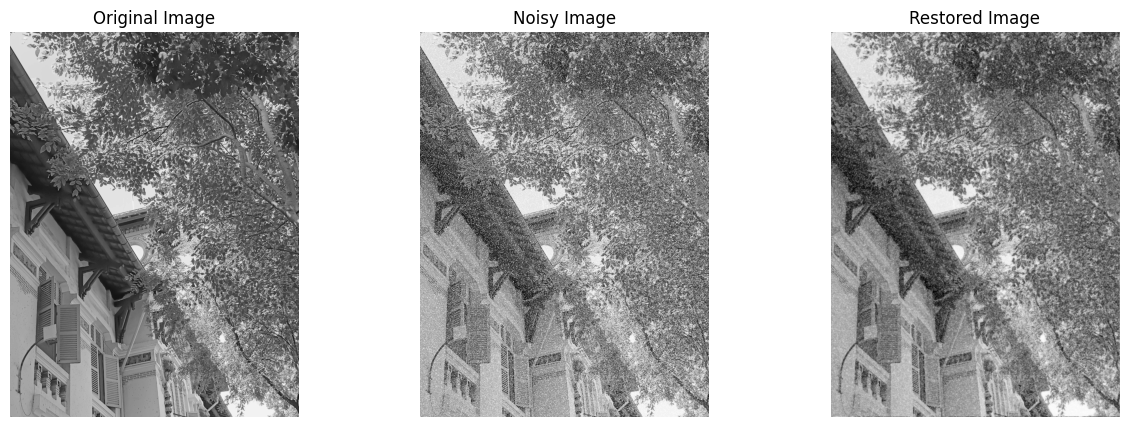

SSIM: 0.1495335107002578
PSNR: 12.545371223614692


In [115]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def inverse_filtering(image, kernel):
    # Fourier transform của ảnh
    img_fft = np.fft.fft2(image)
    
    # Fourier transform của kernel
    kernel_fft = np.fft.fft2(kernel, s=image.shape)
    
    # Lọc ngược
    restored_img_fft = img_fft / kernel_fft
    
    # Fourier transform ngược để lấy ảnh gốc
    restored_img = np.fft.ifft2(restored_img_fft)
    
    # Chuyển về ảnh uint8 và loại bỏ phần ảnh ảo
    restored_img = np.abs(restored_img).astype(np.uint8)
    
    return restored_img

def evaluate_performance(original, restored):
    # So sánh sự tương đồng giữa ảnh gốc và ảnh phục hồi
    ssim_score = ssim(original, restored)
    
    # Tính PSNR
    psnr_score = psnr(original, restored)
    
    return ssim_score, psnr_score

# Tạo nhiễu Gaussian
noise = np.random.normal(0, 1, image.shape).astype(np.uint8)

# Thêm nhiễu vào ảnh gốc
noisy_image = cv2.add(image, noise)

# Định nghĩa kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Phục hồi ảnh
inverse_restored_image = inverse_filtering(noisy_image, kernel)

# So sánh hiệu suất
inverse_ssim_score, inverse_psnr_score = evaluate_performance(noisy_image, inverse_restored_image)

# Hiển thị ảnh gốc và ảnh phục hồi
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(inverse_restored_image, cmap='gray')
plt.title('Restored Image')
plt.axis('off')

plt.show()

print("SSIM:", inverse_ssim_score)
print("PSNR:", inverse_psnr_score)


wiener filtering

C:\Users\Hieu PC\AppData\Local\Temp\ipykernel_19120\1785707710.py:20: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)


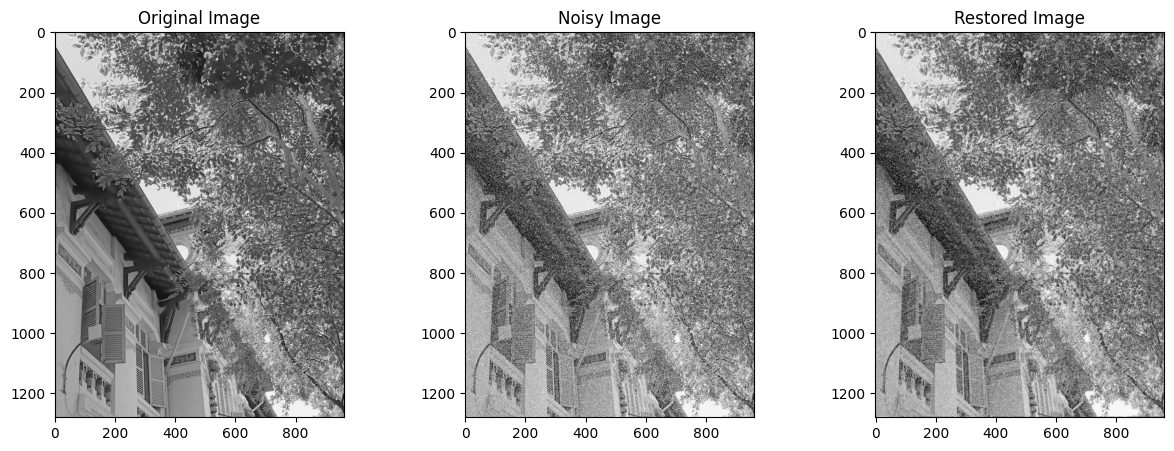

SSIM: 0.002381226751607299
PSNR: 4.528647398416966


In [117]:
import cv2
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = fft2(dummy)
    kernel = fft2(kernel, s=img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return dummy

def gaussian_kernel(kernel_size=3):
    h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h

def evaluate_performance(original, restored):
    ssim_score = ssim(original, restored, data_range=original.max() - original.min())
    psnr_score = psnr(original, restored, data_range=original.max() - original.min())
    return ssim_score, psnr_score

# Create Gaussian kernel
kernel = gaussian_kernel(3)

# Add Gaussian noise to the image
noise = np.random.normal(0, 1, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, noise)

# Apply Wiener filter
wiener_restored_image = wiener_filter(noisy_image, kernel, K=30)

# Evaluate performance
wiener_ssim_score, wiener_psnr_score = evaluate_performance(noisy_image, wiener_restored_image)

# Display original, noisy, and restored images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 3, 3)
plt.imshow(wiener_restored_image, cmap='gray')
plt.title('Restored Image')

plt.show()

print("SSIM:", wiener_ssim_score)
print("PSNR:", wiener_psnr_score)


Total variation regularization

C:\Users\Hieu PC\AppData\Local\Temp\ipykernel_19120\2914957882.py:29: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)


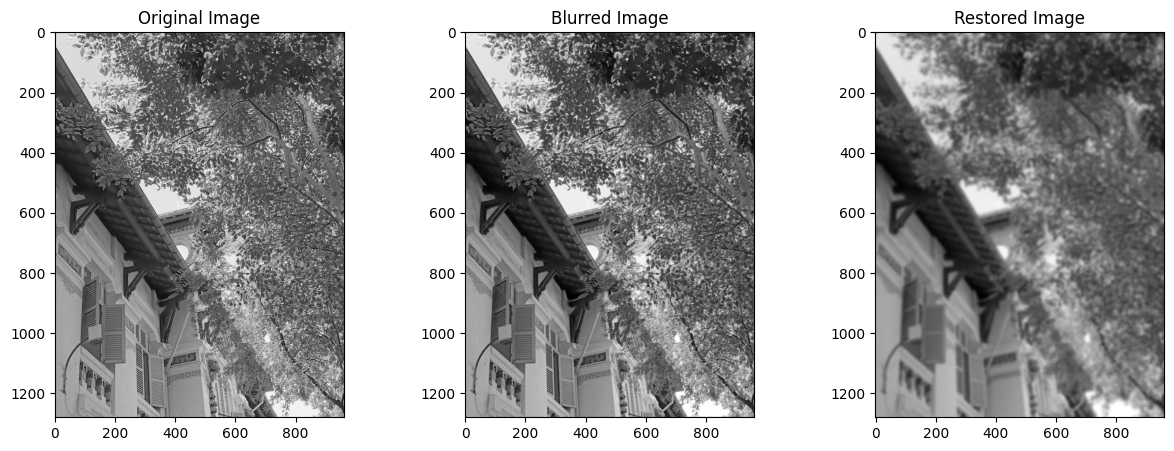

SSIM: 0.03293797679954315
PSNR: 7.830925696381781


In [118]:
import numpy as np
import cv2
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt

def tv_regularization(image, lambda_=0.1, iterations=100):
    """
    Total variation regularization cho việc phục hồi hình ảnh.
    
    Tham số:
        image (numpy.ndarray): Hình ảnh đầu vào.
        lambda_ (float): Tham số chính quy.
        iterations (int): Số lần lặp.
    
    Trả về:
        numpy.ndarray: Hình ảnh được phục hồi.
    """
    u = image.astype(np.float64)
    h, w = image.shape[:2]
    
    for _ in range(iterations):
        grad_u = cv2.Laplacian(u, cv2.CV_64F)
        u += lambda_ * grad_u
    
    return u.astype(np.uint8)

def gaussian_kernel(kernel_size=3):
    h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h

def evaluate_performance(original, restored):
    ssim_score = ssim(original, restored, data_range=original.max() - original.min())
    psnr_score = psnr(original, restored, data_range=original.max() - original.min())
    return ssim_score, psnr_score

# Create Gaussian kernel
kernel = gaussian_kernel(3)

# Add Gaussian noise to the image
noise = np.random.normal(0, 10, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, noise)
# Áp dụng chính quy hoá biến thể toàn phần cho việc phục hồi hình ảnh
tvr_restored_image = tv_regularization(image)

# Tính toán điểm tương đồng cấu trúc (SSIM) và tỷ lệ PSNR
tvr_ssim_score, tvr_psnr_score = evaluate_performance(noisy_image, tvr_restored_image)

# Display original, blurred, and restored images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')

plt.subplot(1, 3, 3)
plt.imshow(tvr_restored_image, cmap='gray')
plt.title('Restored Image')

plt.show()

print("SSIM:", tvr_ssim_score)
print("PSNR:", tvr_psnr_score)



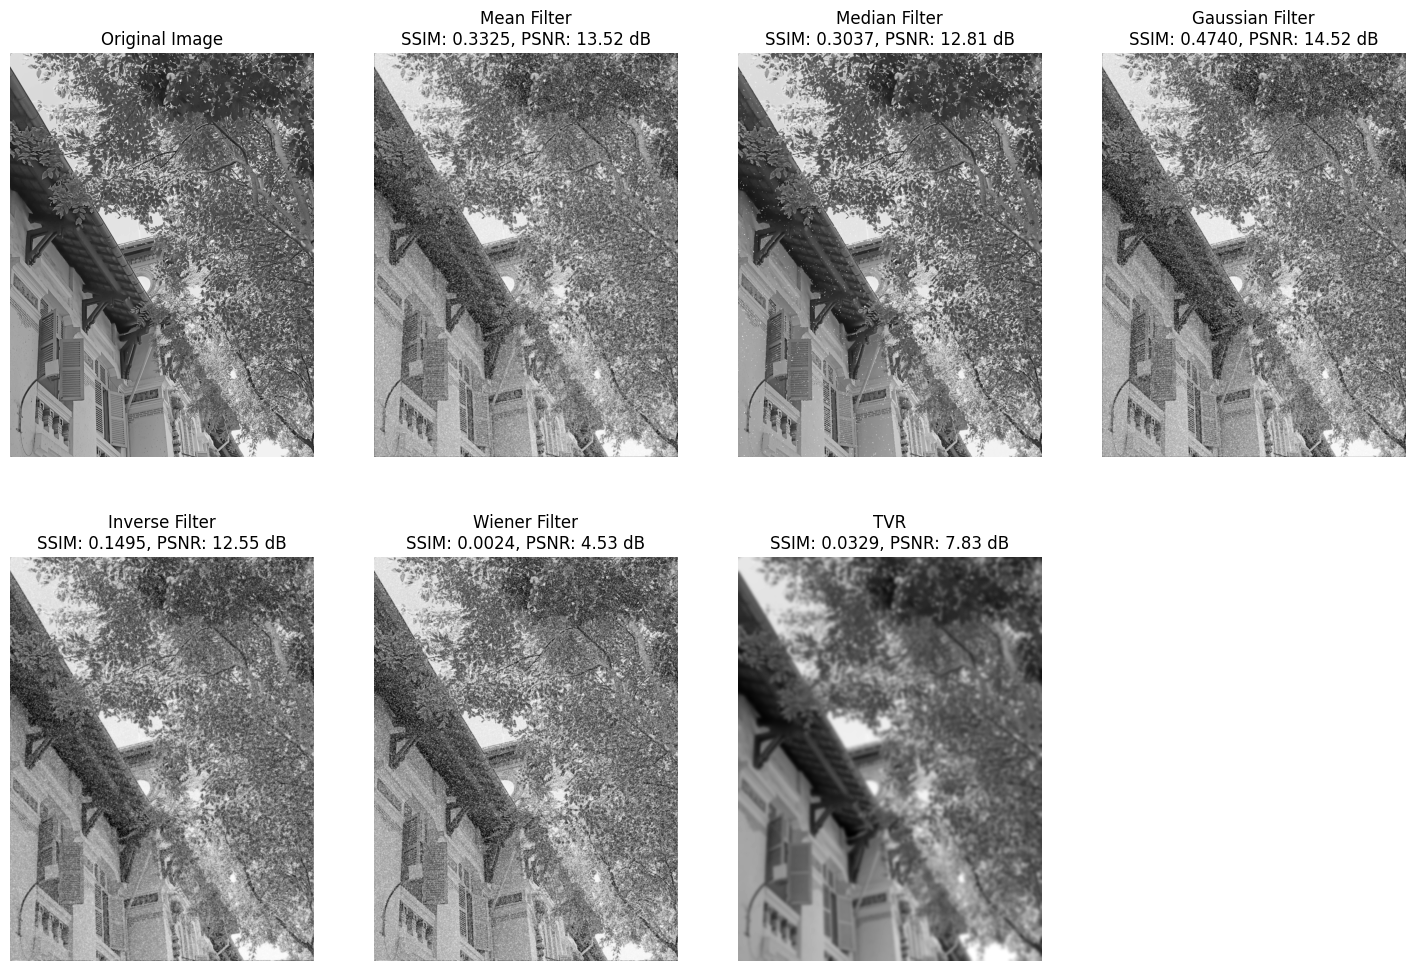

In [119]:
display = [
    image, mean_restored_image, median_restored_image, gaussian_restored_image,
    inverse_restored_image, wiener_restored_image, tvr_restored_image
]
label = [
    'Original Image',
    f'Mean Filter\nSSIM: {mean_ssim_score:.4f}, PSNR: {mean_psnr_score:.2f} dB',
    f'Median Filter\nSSIM: {median_ssim_score:.4f}, PSNR: {median_psnr_score:.2f} dB',
    f'Gaussian Filter\nSSIM: {gaussian_ssim_score:.4f}, PSNR: {gaussian_psnr_score:.2f} dB',
    f'Inverse Filter\nSSIM: {inverse_ssim_score:.4f}, PSNR: {inverse_psnr_score:.2f} dB',
    f'Wiener Filter\nSSIM: {wiener_ssim_score:.4f}, PSNR: {wiener_psnr_score:.2f} dB',
    f'TVR\nSSIM: {tvr_ssim_score:.4f}, PSNR: {tvr_psnr_score:.2f} dB'
]

fig = plt.figure(figsize=(18, 12))

for i in range(len(display)):
    fig.add_subplot(2, 4, i + 1)
    plt.imshow(display[i], cmap='gray')
    plt.title(label[i])
    plt.axis('off')

plt.show()

In [120]:
import pandas as pd
# Create a DataFrame to store the results
data = {
    'Filter': ['Mean', 'Median', 'Gaussian', 'Inverse', 'Wiener', 'TVR'],
    'SSIM': [mean_ssim_score, median_ssim_score, gaussian_ssim_score, inverse_ssim_score, wiener_ssim_score, tvr_ssim_score],
    'PSNR (dB)': [mean_psnr_score, median_psnr_score, gaussian_psnr_score, inverse_psnr_score, wiener_psnr_score, tvr_psnr_score]
}

df = pd.DataFrame(data)

# Sort the DataFrame by SSIM in descending order
df = df.sort_values(by='SSIM', ascending=False).reset_index(drop=True)

print(df)

     Filter      SSIM  PSNR (dB)
0  Gaussian  0.473990  14.516860
1      Mean  0.332543  13.524822
2    Median  0.303689  12.806099
3   Inverse  0.149534  12.545371
4       TVR  0.032938   7.830926
5    Wiener  0.002381   4.528647
